<a href="https://colab.research.google.com/github/nirjhar-das/Activated_Machines/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from zipfile import ZipFile
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print(X_train.shape)

(60000, 28, 28, 1)


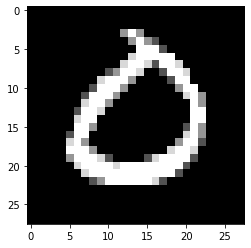

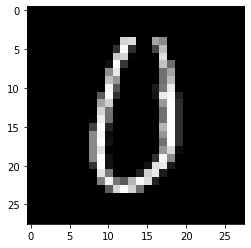

In [13]:
for i in range(2):
  plt.imshow(X_train[np.random.randint(0, 60000), :, :], cmap='Greys_r')
  plt.show()

In [15]:
X_train = X_train/255.0

In [16]:
inputs = tf.keras.Input(shape=(28, 28, 1))
A = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu')(inputs)
A = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu')(A)
A = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(A)
A = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu')(A)
A = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu')(A)
A = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(A)
A = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu')(A)
A = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu')(A)
A = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(A)
A = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu')(A)
A = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(A)
A = tf.keras.layers.Flatten()(A)
A = tf.keras.layers.Dense(128, activation='relu')(A)
output = tf.keras.layers.Dense(10, activation='relu')(A)

In [17]:
model = tf.keras.Model(inputs=inputs, outputs= output, name='MNIST_Model1')
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "MNIST_Model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)      

In [18]:
history1 = model.fit(x=X_train, y=Y_train, batch_size=2048, epochs=30, validation_split=0.25, verbose=2)

Epoch 1/30
22/22 - 16s - loss: 2.0473 - accuracy: 0.2760 - val_loss: 1.8140 - val_accuracy: 0.3965
Epoch 2/30
22/22 - 12s - loss: 1.4423 - accuracy: 0.5373 - val_loss: 1.1840 - val_accuracy: 0.6326
Epoch 3/30
22/22 - 12s - loss: 1.0661 - accuracy: 0.6614 - val_loss: 0.8315 - val_accuracy: 0.7277
Epoch 4/30
22/22 - 12s - loss: 0.6719 - accuracy: 0.7559 - val_loss: 0.5918 - val_accuracy: 0.7734
Epoch 5/30
22/22 - 12s - loss: 0.5778 - accuracy: 0.7764 - val_loss: 0.5566 - val_accuracy: 0.7803
Epoch 6/30
22/22 - 12s - loss: 0.5398 - accuracy: 0.7847 - val_loss: 0.5414 - val_accuracy: 0.7815
Epoch 7/30
22/22 - 12s - loss: 0.5288 - accuracy: 0.7864 - val_loss: 0.5345 - val_accuracy: 0.7833
Epoch 8/30
22/22 - 12s - loss: 0.5142 - accuracy: 0.7902 - val_loss: 0.5163 - val_accuracy: 0.7889
Epoch 9/30
22/22 - 12s - loss: 0.5071 - accuracy: 0.7914 - val_loss: 0.5111 - val_accuracy: 0.7887
Epoch 10/30
22/22 - 12s - loss: 0.5006 - accuracy: 0.7926 - val_loss: 0.5093 - val_accuracy: 0.7885
Epoch 11/

In [19]:
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])


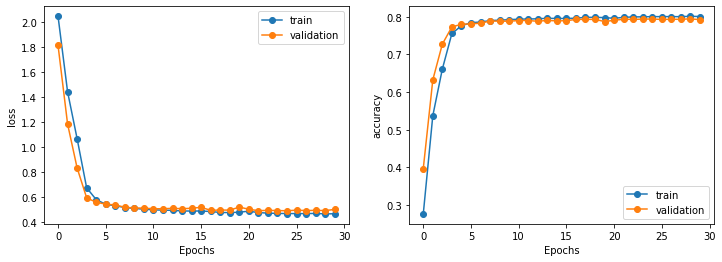

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history1, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history1, 'accuracy','val_accuracy')

In [37]:
class TestActivation(tf.keras.layers.Layer):
  def __init__(self, Lambda = 0.5):
    self.L = tf.Variable(Lambda, dtype='float32', trainable=True)
    super(TestActivation, self).__init__()

  def call(self, inputs):
    A = self.L*tf.nn.relu(inputs) + (1 - self.L)*tf.nn.tanh(inputs)
    return A


In [46]:
inputs1 = tf.keras.Input(shape=(28, 28, 1))
B = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1))(inputs1)
L1 = TestActivation()
B = L1(B)
B = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1))(B)
L2 = TestActivation()
B = L2(B)
B = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(B)
B = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1))(B)
L3 = TestActivation()
B = L3(B)
B = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1))(B)
L4 = TestActivation()
B = L4(B)
B = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(B)
B = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1))(B)
L5 = TestActivation()
B = L5(B)
B = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1))(B)
L6 = TestActivation()
B = L6(B)
B = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(B)
B = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1))(B)
L7 = TestActivation()
B = L7(B)
B = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(B)
B = tf.keras.layers.Flatten()(B)
B = tf.keras.layers.Dense(128)(B)
L8 = TestActivation()
B = L8(B)
output1 = tf.keras.layers.Dense(10, activation='relu')(B)


In [47]:
model2 = tf.keras.Model(inputs=inputs1, outputs= output1, name='MNIST_Model2')
model2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer= 'adam', metrics=['accuracy'])
model2.summary()

Model: "MNIST_Model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
test_activation_16 (TestActi (None, 24, 24, 16)        1         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
test_activation_17 (TestActi (None, 22, 22, 32)        1         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 18, 18, 64)       

In [48]:
history2 = model2.fit(x=X_train, y=Y_train, batch_size=2048, epochs=30, validation_split=0.25, verbose=2)

Epoch 1/30
22/22 - 20s - loss: 1.5768 - accuracy: 0.4429 - val_loss: 0.6283 - val_accuracy: 0.7985
Epoch 2/30
22/22 - 18s - loss: 0.3416 - accuracy: 0.8956 - val_loss: 0.1864 - val_accuracy: 0.9418
Epoch 3/30
22/22 - 18s - loss: 0.1350 - accuracy: 0.9575 - val_loss: 0.1043 - val_accuracy: 0.9679
Epoch 4/30
22/22 - 18s - loss: 0.0849 - accuracy: 0.9742 - val_loss: 0.0834 - val_accuracy: 0.9741
Epoch 5/30
22/22 - 18s - loss: 0.0663 - accuracy: 0.9789 - val_loss: 0.0753 - val_accuracy: 0.9777
Epoch 6/30
22/22 - 18s - loss: 0.0585 - accuracy: 0.9817 - val_loss: 0.0701 - val_accuracy: 0.9780
Epoch 7/30
22/22 - 18s - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0579 - val_accuracy: 0.9827
Epoch 8/30
22/22 - 18s - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0528 - val_accuracy: 0.9834
Epoch 9/30
22/22 - 18s - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0547 - val_accuracy: 0.9840
Epoch 10/30
22/22 - 18s - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0531 - val_accuracy: 0.9831
Epoch 11/

In [49]:
L1.L

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.49106556>

In [50]:
L2.L

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.49769127>

In [51]:
L3.L

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.49737808>

In [52]:
print(L4.L, L5.L, L6.L, L7.L, L8.L)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.49244547> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.5207312> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.47322485> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.4618321> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.58883303>


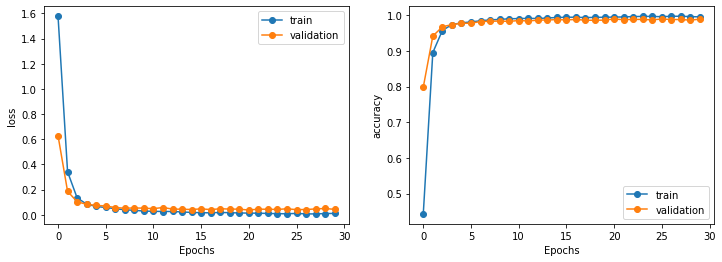

In [53]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history2, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history2, 'accuracy','val_accuracy')

In [54]:
X_test = X_test/255.0

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
Y_pred = model.predict(x=X_test)
Y_label = np.argmax(Y_pred, axis=1)
acc_generic = accuracy_score(Y_test, Y_label)
print(acc_generic)

0.8008


In [58]:
Y_pred_cus = model2.predict(x=X_test)
Y_label_cus = np.argmax(Y_pred_cus, axis=1)
acc_cus = accuracy_score(Y_test, Y_label_cus)
print(acc_cus)

0.9921
